<a href="https://colab.research.google.com/github/AnushreeHazra/ML_Projects/blob/main/Predicting_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Data Importing

In [ ]:
df = pd.read_csv('/content/Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

EDA

<ipython-input-22-2e86102d1a7a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Attrition'], palette = 'mako')


<Axes: xlabel='count', ylabel='Attrition'>

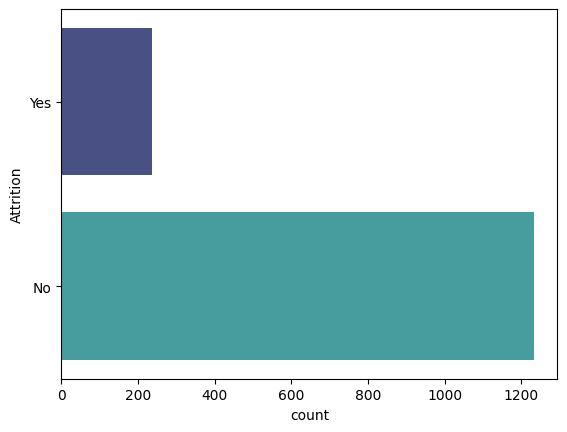

In [ ]:
import seaborn as sns
sns.countplot(df['Attrition'], palette = 'mako')

Data Visualization

<Axes: xlabel='Age', ylabel='count'>

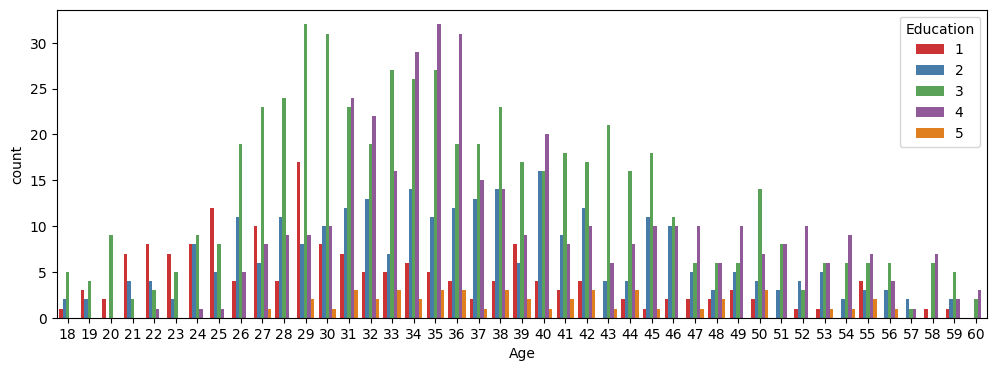

In [ ]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Education', palette = 'Set1' ,data=df)

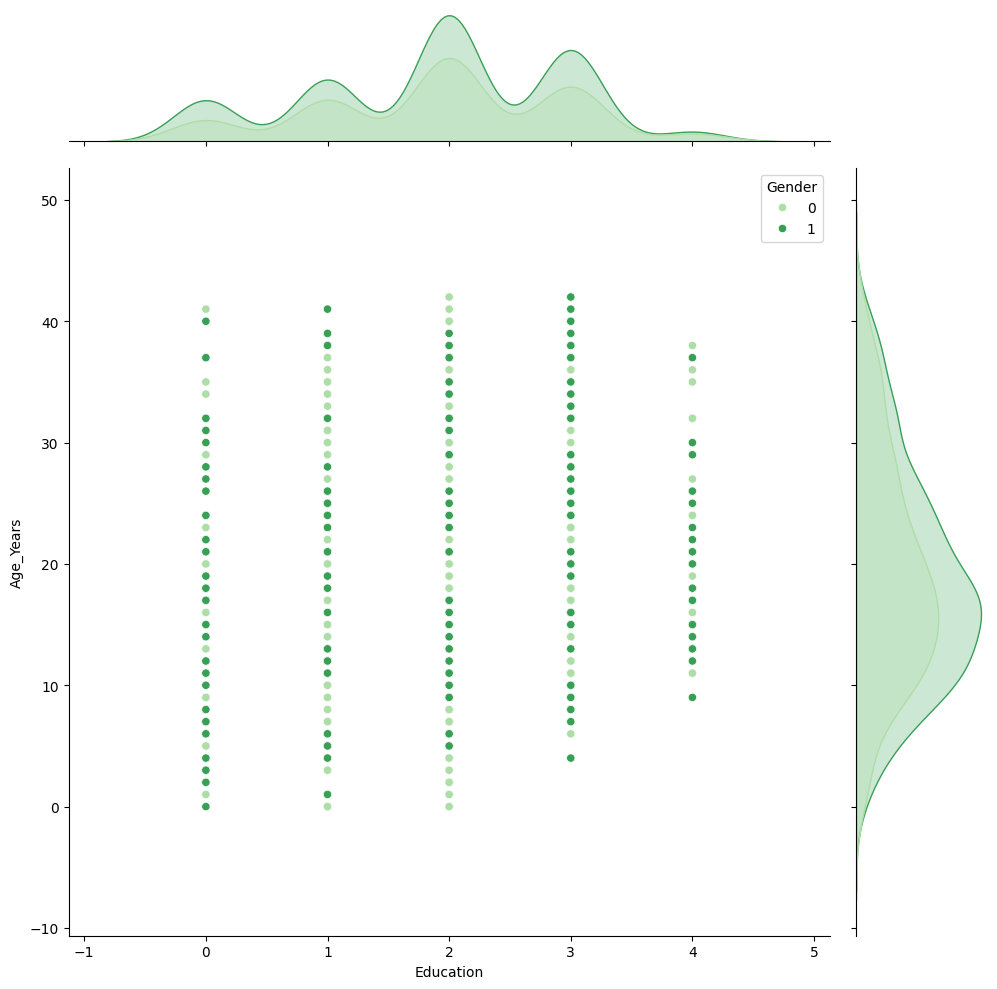

In [ ]:
sns.jointplot(x='Education',y='Age_Years', hue='Gender', palette = 'Greens', data=df,height=10)

<Axes: xlabel='HourlyRate', ylabel='count'>

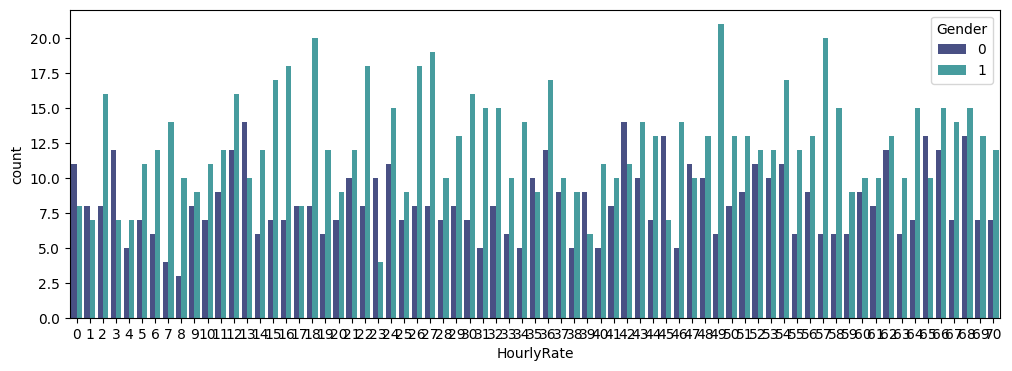

In [ ]:
plt.subplots(figsize=(12,4))
sns.countplot(x='HourlyRate', hue='Gender', palette = 'mako', data=df)

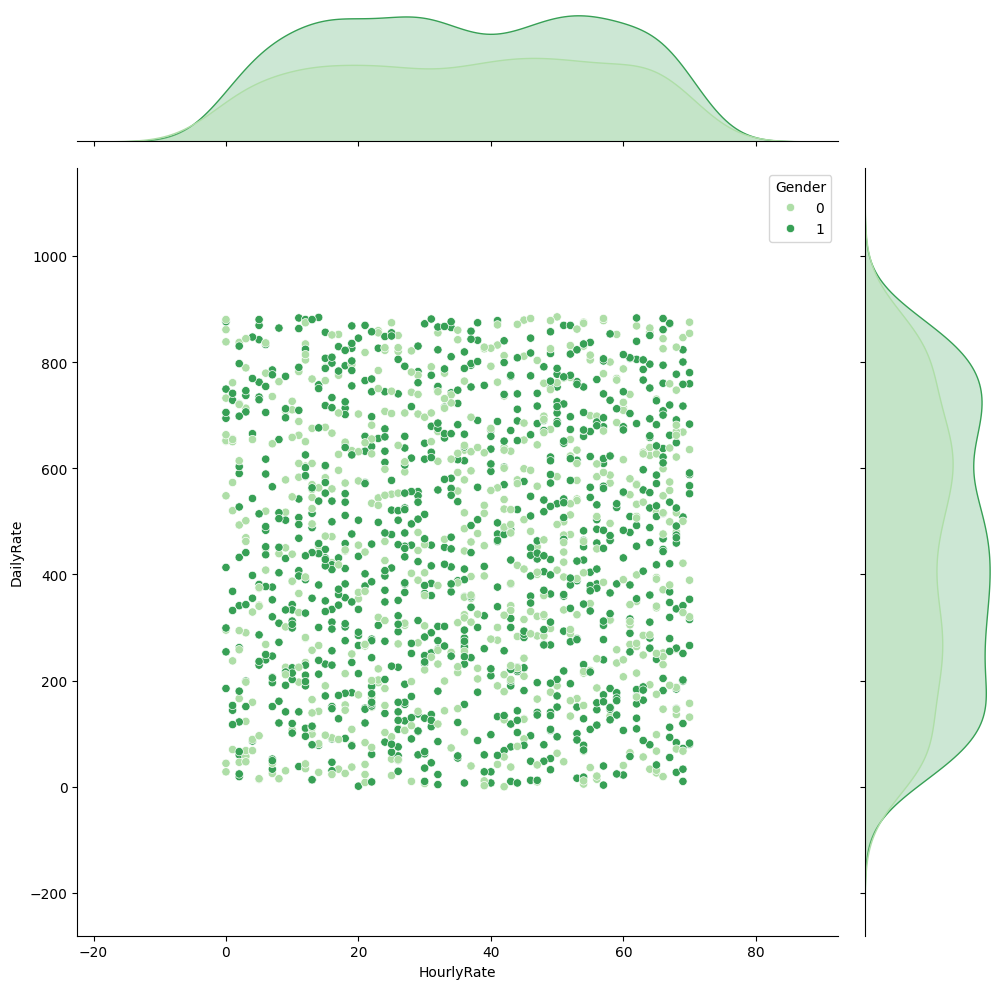

In [ ]:
sns.jointplot(x='HourlyRate',y='DailyRate', hue='Gender', data=df, palette = 'Greens',height=10)

In [ ]:
df['StandardHours'].unique()

array([80])

In [ ]:
df = df.drop("Over18", axis=1)
df = df.drop("EmployeeNumber", axis=1)
df = df.drop("StandardHours", axis=1)
df = df.drop("EmployeeCount", axis=1)

In [ ]:
df.corr()

<ipython-input-40-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<ipython-input-42-c1fda6c07851>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.0%' )


<Axes: >

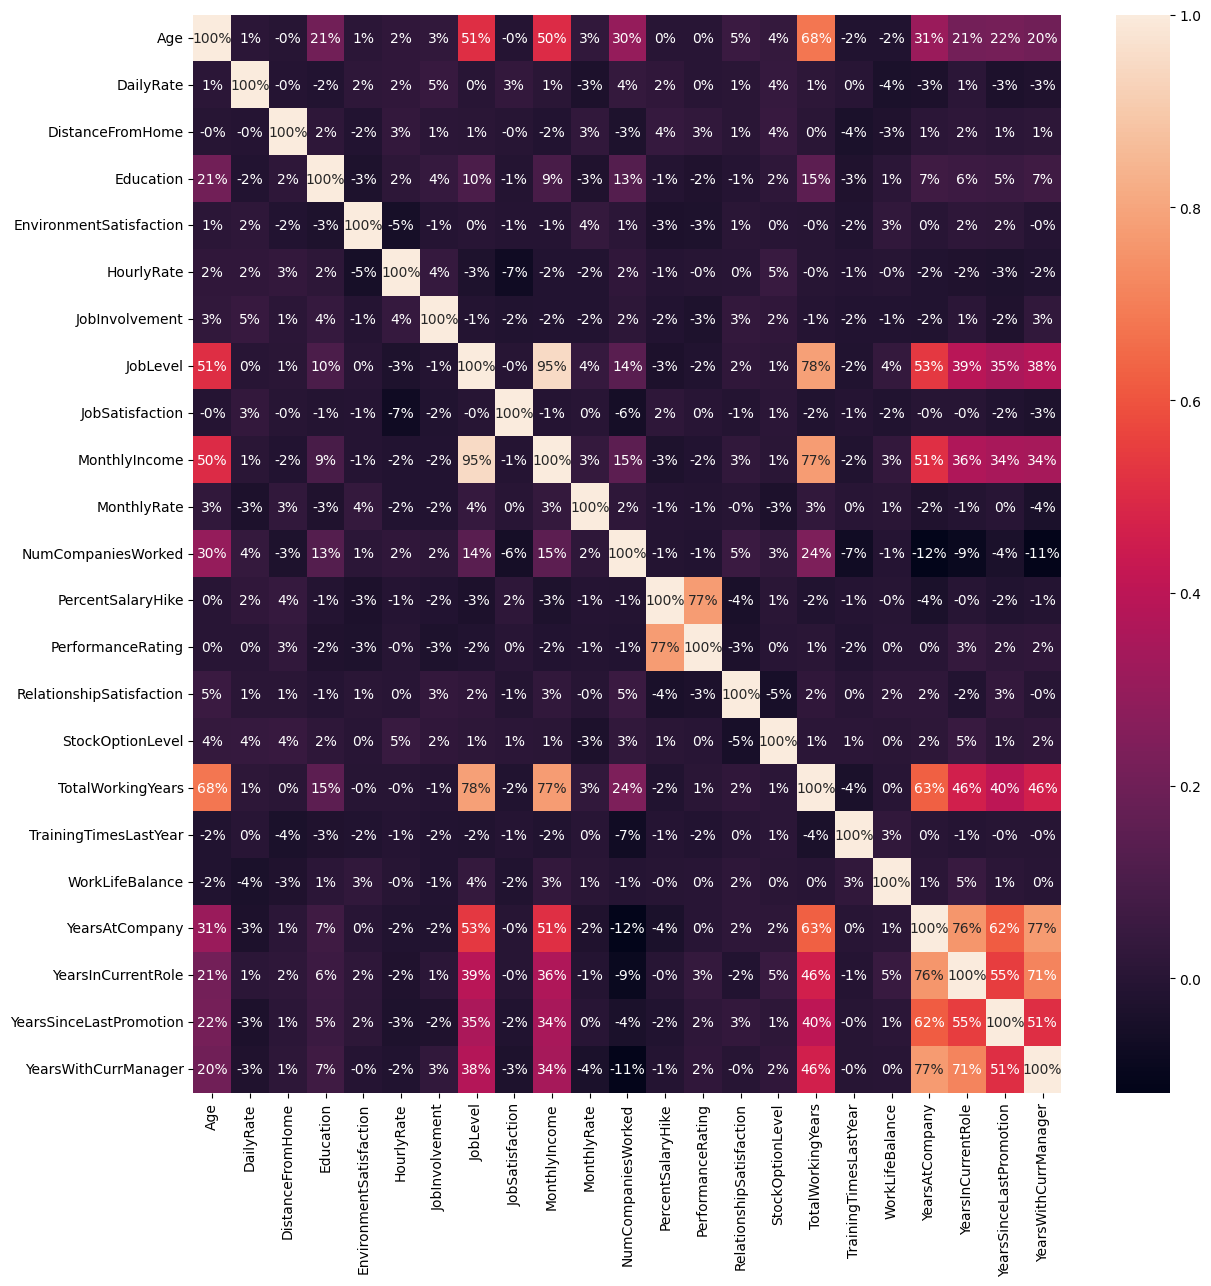

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt='.0%' )

In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-43-7cdda11c092a>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-43-7cdda11c092a>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-43-7cdda11c092a>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-43-7cdda11c092a>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-43-7cdda11c092a>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprec

In [ ]:
df['Age_Years'] = df['Age']

In [ ]:
df = df.drop('Age', axis=1)

In [ ]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9


In [ ]:
X = df.iloc[:, 1:df.shape[1]].values
y = df.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

-------------------- LOGISTIC REGRESSION --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       621
           1       0.66      0.40      0.50       114

    accuracy                           0.87       735
   macro avg       0.78      0.68      0.71       735
weighted avg       0.86      0.87      0.86       735

-------------------------------------------------------------


<Axes: title={'center': 'Confusion Matrix'}>

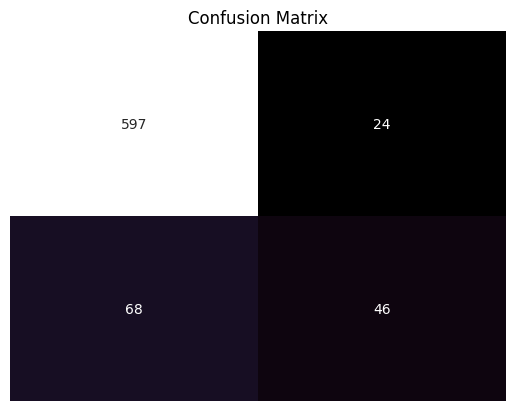

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
LogisticRegression(solver='liblinear')
logreg_pred = logreg.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
viz_str = '-'* 20
print(viz_str,'LOGISTIC REGRESSION',viz_str)
print('Classification report:')
print(classification_report(y_test,logreg_pred))
print('-'*61)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,logreg_pred),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)

-------------------- DECISION TREE --------------------
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       621
           1       1.00      1.00      1.00       114

    accuracy                           1.00       735
   macro avg       1.00      1.00      1.00       735
weighted avg       1.00      1.00      1.00       735

-------------------------------------------------------------


<Axes: title={'center': 'Confusion Matrix'}>

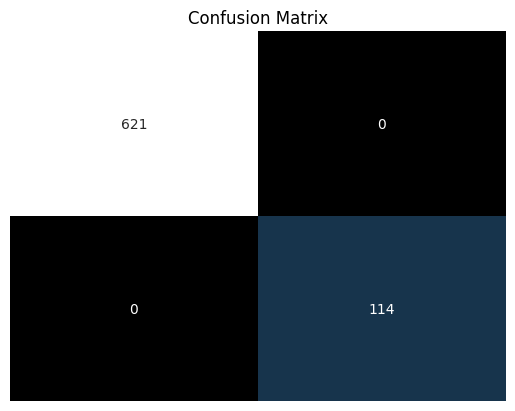

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_test,y_test)
DecisionTreeClassifier()
dtree_pred = dtree.predict(X_test)
viz_str = '-'* 20
print(viz_str,'DECISION TREE',viz_str)
print('Classification report:')
print(classification_report(y_test,dtree_pred))
print('-'*61)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,dtree_pred),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)

-------------------- RANDOM FOREST --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       621
           1       0.85      0.15      0.25       114

    accuracy                           0.86       735
   macro avg       0.86      0.57      0.59       735
weighted avg       0.86      0.86      0.82       735

-------------------------------------------------------------


<Axes: title={'center': 'Confusion Matrix'}>

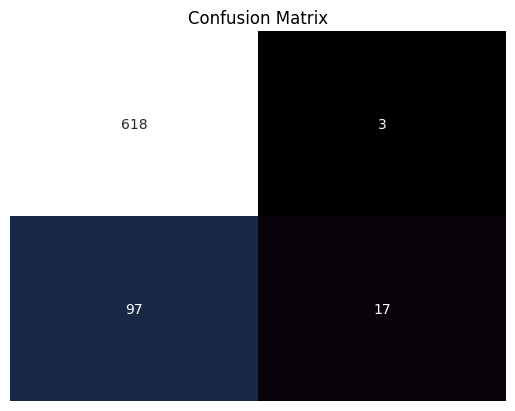

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rndfrst = RandomForestClassifier(n_estimators=100)
rndfrst.fit(X_train,y_train)
RandomForestClassifier()
rndfrst_pred = rndfrst.predict(X_test)
viz_str = '-'* 20
print(viz_str,'RANDOM FOREST',viz_str)
print('Classification report:')
print(classification_report(y_test,rndfrst_pred))
print('-'*61)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,rndfrst_pred),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,0.1,1,10],'gamma':[1,0.01,0.001]}
svm = SVC()
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...................C=0.01, gamma=1;, score=0.837 total time=   0.0s
[CV 2/5] END ...................C=0.01, gamma=1;, score=0.837 total time=   0.0s
[CV 3/5] END ...................C=0.01, gamma=1;, score=0.830 total time=   0.0s
[CV 4/5] END ...................C=0.01, gamma=1;, score=0.830 total time=   0.0s
[CV 5/5] END ...................C=0.01, gamma=1;, score=0.830 total time=   0.0s
[CV 1/5] END ................C=0.01, gamma=0.01;, score=0.837 total time=   0.0s
[CV 2/5] END ................C=0.01, gamma=0.01;, score=0.837 total time=   0.0s
[CV 3/5] END ................C=0.01, gamma=0.01;, score=0.830 total time=   0.0s
[CV 4/5] END ................C=0.01, gamma=0.01;, score=0.830 total time=   0.0s
[CV 5/5] END ................C=0.01, gamma=0.01;, score=0.830 total time=   0.0s
[CV 1/5] END ...............C=0.01, gamma=0.001;, score=0.837 total time=   0.0s
[CV 2/5] END ...............C=0.01, gamma=0.001;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [1, 0.01, 0.001]},
             verbose=3)

-------------------- KNN --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       621
           1       0.00      0.00      0.00       114

    accuracy                           0.84       735
   macro avg       0.42      0.50      0.46       735
weighted avg       0.71      0.84      0.77       735

-------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: title={'center': 'Confusion Matrix'}>

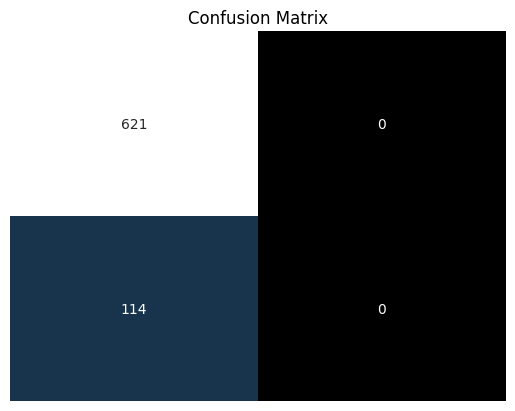

In [ ]:

final_svm = SVC(C=1, gamma=0.01)
final_svm.fit(X_train,y_train)

svm_pred = final_svm.predict(X_test)
viz_str = '-'* 20
print(viz_str,'KNN',viz_str)
print('Classification report:')
print(classification_report(y_test,svm_pred))
print('-'*55)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)

In [ ]:
forest.score(X_train, y_train)

0.9428571428571428

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model Testing Accuracy = {}'.format((TP + TN / (TP + TN + FN + FP))))

[[620   1]
 [ 29  85]]
Model Testing Accuracy = 85.843537414966


**Thank** **You**